# Lyra Health Data Challenge

## How do primary care physicians (PCPs) who prescribe psychiatric medications differ from psychiatrists in their treatment patterns? Define PCPs as anyone specializing in Internal Medicine, General Practice or Family Practice; and define psychiatrists as people who specialized in Psychiatry & Neurology.

#### Let us begin by reading the file as a csv using Pandas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import csv

%matplotlib inline 

## Data Wrangling and Understanding the Variables

In [3]:
df = pd.read_csv('Medicare_Provider_Utilization_and_Payment_Data__2016_Part_D_Prescriber.csv.crdownload')

In [4]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,NaN,...,15.0,450.0,139.32,NaN,*,13.0,NaN,15.0,450.0,139.32
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,...,11.0,96.0,80.99,NaN,*,NaN,*,NaN,NaN,NaN
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,20.0,...,20.0,199.0,586.12,NaN,#,NaN,#,NaN,NaN,NaN
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ELIQUIS,APIXABAN,NaN,...,17.0,510.0,6065.02,NaN,*,17.0,NaN,17.0,510.0,6065.02
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,FUROSEMIDE,FUROSEMIDE,12.0,...,17.0,405.0,45.76,NaN,#,NaN,#,NaN,NaN,NaN


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.index

RangeIndex(start=0, stop=73925, step=1)

In [7]:
df.values

array([[1003000126, 'ENKESHAFI', 'ARDALAN', ..., 15.0, 450.0, 139.32],
       [1003000126, 'ENKESHAFI', 'ARDALAN', ..., nan, nan, nan],
       [1003000126, 'ENKESHAFI', 'ARDALAN', ..., nan, nan, nan],
       ...,
       [1487697322, 'SILVEUS', 'PATRICK', ..., 26.0, 748.0, 271.98],
       [1891994588, 'GIULIANI', 'ROSANNE', ..., nan, nan, nan],
       [1265470975, 'MELTON', 'CATH', ..., nan, nan, nan]], dtype=object)

In [8]:
df.describe()

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,7.392500e+04,29020.000000,73924.000000,73924.000000,73924.000000,7.392400e+04,10280.000000,42552.000000,42552.000000,42552.000000,4.255200e+04
mean,1.498943e+09,28.972364,51.721444,77.965450,2183.025418,4.357058e+03,20.863521,48.603873,76.168838,2163.442893,3.586165e+03
std,2.883823e+08,28.380052,90.878217,140.366399,4070.098148,2.407933e+04,32.447087,91.566857,145.991208,4218.396253,1.777600e+04
min,1.003000e+09,11.000000,11.000000,11.000000,11.000000,7.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.245425e+09,14.000000,15.000000,19.000000,450.000000,2.465875e+02,0.000000,13.000000,16.000000,390.000000,1.968775e+02
50%,1.497896e+09,20.000000,25.000000,35.000000,930.000000,6.548050e+02,13.000000,21.000000,32.000000,887.000000,5.836500e+02
75%,1.750325e+09,32.000000,51.000000,75.000000,2092.000000,2.247195e+03,24.000000,46.000000,71.225000,2010.000000,2.011820e+03
max,1.992996e+09,837.000000,8040.000000,8051.500000,137616.000000,1.390998e+06,704.000000,6877.000000,6886.900000,117057.000000,1.154469e+06


In [9]:
df.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'bene_count_ge65_suppress_flag',
       'total_claim_count_ge65', 'ge65_suppress_flag',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65'],
      dtype='object')

In [10]:
list(df)

['npi',
 'nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_city',
 'nppes_provider_state',
 'specialty_description',
 'description_flag',
 'drug_name',
 'generic_name',
 'bene_count',
 'total_claim_count',
 'total_30_day_fill_count',
 'total_day_supply',
 'total_drug_cost',
 'bene_count_ge65',
 'bene_count_ge65_suppress_flag',
 'total_claim_count_ge65',
 'ge65_suppress_flag',
 'total_30_day_fill_count_ge65',
 'total_day_supply_ge65',
 'total_drug_cost_ge65']

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,73915,73916,73917,73918,73919,73920,73921,73922,73923,73924
npi,1003000126,1003000126,1003000126,1003000126,1003000126,1003000126,1003000126,1003000126,1003000126,1003000126,...,1851438584,1962675462,1427138015,1275560583,1871717751,1427044155,1568685097,1487697322,1891994588,1265470975
nppes_provider_last_org_name,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,ENKESHAFI,...,MINES,GRAY,LANDREVILLE,ZIBOH,REDMOND,CLARK,TODEA,SILVEUS,GIULIANI,MELTON
nppes_provider_first_name,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,ARDALAN,...,ARTHUR,JAMES,WENDY,MAUREEN,WENDY,ALAN,CRINELA,PATRICK,ROSANNE,CATH
nppes_provider_city,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,...,MILWAUKEE,WATERBURY,SAN CARLOS,MISHAWAKA,COSHOCTON,GASTONIA,TAYLOR,MENTONE,BALTIMORE,NaN
nppes_provider_state,MD,MD,MD,MD,MD,MD,MD,MD,MD,MD,...,WI,CT,CA,IN,OH,NC,MI,IN,MD,NaN
specialty_description,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,...,Family Practice,Cardiovascular Disease (Cardiology),Family Practice,Family Practice,Family Practice,Internal Medicine,Nurse Practitioner,Family Practice,Physician Assistant,NaN
description_flag,S,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,S,NaN
drug_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,ELIQUIS,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE ER,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN-HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,NaN
generic_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,APIXABAN,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN/HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,NaN
bene_count,NaN,NaN,20,NaN,12,NaN,16,26,14,14,...,NaN,NaN,NaN,16,18,NaN,13,NaN,NaN,NaN


### In reading these variables, I would like to look into detail at the specialty_descriptions and create a group (labeled PCPs) and combine Internal Medicine, General Practice and Family Practice physicians into this group. This will allow the comparison between PCPs and Psychiatrists better

In [12]:
df = df.drop(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name', 'description_flag'], axis=1)

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,73915,73916,73917,73918,73919,73920,73921,73922,73923,73924
nppes_provider_city,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,...,MILWAUKEE,WATERBURY,SAN CARLOS,MISHAWAKA,COSHOCTON,GASTONIA,TAYLOR,MENTONE,BALTIMORE,NaN
nppes_provider_state,MD,MD,MD,MD,MD,MD,MD,MD,MD,MD,...,WI,CT,CA,IN,OH,NC,MI,IN,MD,NaN
specialty_description,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,...,Family Practice,Cardiovascular Disease (Cardiology),Family Practice,Family Practice,Family Practice,Internal Medicine,Nurse Practitioner,Family Practice,Physician Assistant,NaN
drug_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,ELIQUIS,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE ER,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN-HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,NaN
generic_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,APIXABAN,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN/HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,NaN
bene_count,NaN,NaN,20,NaN,12,NaN,16,26,14,14,...,NaN,NaN,NaN,16,18,NaN,13,NaN,NaN,NaN
total_claim_count,13,11,20,17,17,16,33,26,31,33,...,20,16,19,66,57,56,42,14,11,NaN
total_30_day_fill_count,15,11,20,17,17,16,35,26,32,37,...,36,36,27,94,113,57,60,26,11,NaN
total_day_supply,450,96,199,510,405,420,1005,159,960,1050,...,1080,1080,810,2820,3390,1688,1800,748,322,NaN
total_drug_cost,139.32,80.99,586.12,6065.02,45.76,169.48,372.63,222.41,129.24,183.29,...,403.63,93.59,631.34,566.19,742.53,3910.88,570.89,271.98,512.1,NaN


In [14]:
df_filled = df.fillna(value='Unknown')

In [15]:
df = df_filled

In [16]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,73915,73916,73917,73918,73919,73920,73921,73922,73923,73924
nppes_provider_city,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,...,MILWAUKEE,WATERBURY,SAN CARLOS,MISHAWAKA,COSHOCTON,GASTONIA,TAYLOR,MENTONE,BALTIMORE,Unknown
nppes_provider_state,MD,MD,MD,MD,MD,MD,MD,MD,MD,MD,...,WI,CT,CA,IN,OH,NC,MI,IN,MD,Unknown
specialty_description,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,Internal Medicine,...,Family Practice,Cardiovascular Disease (Cardiology),Family Practice,Family Practice,Family Practice,Internal Medicine,Nurse Practitioner,Family Practice,Physician Assistant,Unknown
drug_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,ELIQUIS,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE ER,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN-HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,Unknown
generic_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,APIXABAN,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,PAROXETINE HCL,HYDROCHLOROTHIAZIDE,DULOXETINE HCL,LOSARTAN/HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,RANITIDINE HCL,PAROXETINE HCL,POTASSIUM CHLORIDE,Unknown
bene_count,Unknown,Unknown,20,Unknown,12,Unknown,16,26,14,14,...,Unknown,Unknown,Unknown,16,18,Unknown,13,Unknown,Unknown,Unknown
total_claim_count,13,11,20,17,17,16,33,26,31,33,...,20,16,19,66,57,56,42,14,11,Unknown
total_30_day_fill_count,15,11,20,17,17,16,35,26,32,37,...,36,36,27,94,113,57,60,26,11,Unknown
total_day_supply,450,96,199,510,405,420,1005,159,960,1050,...,1080,1080,810,2820,3390,1688,1800,748,322,Unknown
total_drug_cost,139.32,80.99,586.12,6065.02,45.76,169.48,372.63,222.41,129.24,183.29,...,403.63,93.59,631.34,566.19,742.53,3910.88,570.89,271.98,512.1,Unknown


####  Combining Internal Medicine, General Practice, and Family Practice into PCP 

In [17]:
df['specialty_description'].replace(to_replace='Internal Medicine', value= 'PCP', inplace=True)
df['specialty_description'].replace(to_replace='General Practice', value='PCP', inplace=True)
df['specialty_description'].replace(to_replace='Family Practice', value='PCP', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73925 entries, 0 to 73924
Data columns (total 17 columns):
nppes_provider_city              73925 non-null object
nppes_provider_state             73925 non-null object
specialty_description            73925 non-null object
drug_name                        73925 non-null object
generic_name                     73925 non-null object
bene_count                       73925 non-null object
total_claim_count                73925 non-null object
total_30_day_fill_count          73925 non-null object
total_day_supply                 73925 non-null object
total_drug_cost                  73925 non-null object
bene_count_ge65                  73925 non-null object
bene_count_ge65_suppress_flag    73925 non-null object
total_claim_count_ge65           73925 non-null object
ge65_suppress_flag               73925 non-null object
total_30_day_fill_count_ge65     73925 non-null object
total_day_supply_ge65            73925 non-null object
total_drug_

In [19]:
df['specialty_description'].describe()

count     73925
unique      104
top         PCP
freq      42677
Name: specialty_description, dtype: object

In [20]:
df['specialty_description'].T

0                                        PCP
1                                        PCP
2                                        PCP
3                                        PCP
4                                        PCP
5                                        PCP
6                                        PCP
7                                        PCP
8                                        PCP
9                                        PCP
10                                       PCP
11                                       PCP
12                                       PCP
13                                       PCP
14                                       PCP
15                            Anesthesiology
16                            Anesthesiology
17                            Anesthesiology
18                            Anesthesiology
19                            Anesthesiology
20                            Anesthesiology
21                            Anesthesiology
22        

In [21]:
df_PCP = df.loc[(df['specialty_description'] == 'PCP')]

In [22]:
df_PCP.head()

,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,CUMBERLAND,MD,PCP,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,Unknown,13,15,450,139.32,Unknown,*,13,Unknown,15,450,139.32
1,CUMBERLAND,MD,PCP,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,Unknown,11,11,96,80.99,Unknown,*,Unknown,*,Unknown,Unknown,Unknown
2,CUMBERLAND,MD,PCP,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,20,20,20,199,586.12,Unknown,#,Unknown,#,Unknown,Unknown,Unknown
3,CUMBERLAND,MD,PCP,ELIQUIS,APIXABAN,Unknown,17,17,510,6065.02,Unknown,*,17,Unknown,17,510,6065.02
4,CUMBERLAND,MD,PCP,FUROSEMIDE,FUROSEMIDE,12,17,17,405,45.76,Unknown,#,Unknown,#,Unknown,Unknown,Unknown


In [23]:
df_PCP.T

,0,1,2,3,4,5,6,7,8,9,...,73910,73911,73912,73913,73915,73917,73918,73919,73920,73922
nppes_provider_city,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,CUMBERLAND,...,GREENVILLE,OCALA,SAN FRANCISCO,MCALLEN,MILWAUKEE,SAN CARLOS,MISHAWAKA,COSHOCTON,GASTONIA,MENTONE
nppes_provider_state,MD,MD,MD,MD,MD,MD,MD,MD,MD,MD,...,TX,FL,CA,TX,WI,CA,IN,OH,NC,IN
specialty_description,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP,...,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP,PCP
drug_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,ELIQUIS,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE ER,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,POLYETHYLENE GLYCOL 3350,ONDANSETRON HCL,TRAVATAN Z,JARDIANCE,PAROXETINE HCL,DULOXETINE HCL,LOSARTAN-HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,PAROXETINE HCL
generic_name,ATORVASTATIN CALCIUM,CIPROFLOXACIN HCL,DOXYCYCLINE HYCLATE,APIXABAN,FUROSEMIDE,HYDRALAZINE HCL,ISOSORBIDE MONONITRATE,LEVOFLOXACIN,LISINOPRIL,METOPROLOL TARTRATE,...,POLYETHYLENE GLYCOL 3350,ONDANSETRON HCL,TRAVOPROST,EMPAGLIFLOZIN,PAROXETINE HCL,DULOXETINE HCL,LOSARTAN/HYDROCHLOROTHIAZIDE,SPIRONOLACTONE,QUETIAPINE FUMARATE,PAROXETINE HCL
bene_count,Unknown,Unknown,20,Unknown,12,Unknown,16,26,14,14,...,11,Unknown,Unknown,Unknown,Unknown,Unknown,16,18,Unknown,Unknown
total_claim_count,13,11,20,17,17,16,33,26,31,33,...,23,23,12,19,20,19,66,57,56,14
total_30_day_fill_count,15,11,20,17,17,16,35,26,32,37,...,23.1,23,12,19,36,27,94,113,57,26
total_day_supply,450,96,199,510,405,420,1005,159,960,1050,...,617,207,264,570,1080,810,2820,3390,1688,748
total_drug_cost,139.32,80.99,586.12,6065.02,45.76,169.48,372.63,222.41,129.24,183.29,...,335.05,216.24,1921.8,7474.2,403.63,631.34,566.19,742.53,3910.88,271.98


In [24]:
df_Psychiatry = df.loc[(df['specialty_description'] == 'Psychiatry & Neurology')]

In [25]:
df_Psychiatry.head()

,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
110,HAMILTON,OH,Psychiatry & Neurology,FLUOXETINE HCL,FLUOXETINE HCL,Unknown,74,76.5,2076,811.03,Unknown,*,12,Unknown,12.2,366,114.31
311,LA JOLLA,CA,Psychiatry & Neurology,ALPRAZOLAM,ALPRAZOLAM,Unknown,12,12,360,115.88,Unknown,*,12,Unknown,12,360,115.88
803,HOUSTON,TX,Psychiatry & Neurology,VYVANSE,LISDEXAMFETAMINE DIMESYLATE,Unknown,23,23,690,5709.05,Unknown,*,23,Unknown,23,690,5709.05
1031,EUGENE,OR,Psychiatry & Neurology,TRAZODONE HCL,TRAZODONE HCL,Unknown,70,70.1,1804,578.12,Unknown,*,Unknown,*,Unknown,Unknown,Unknown
1858,ERIE,PA,Psychiatry & Neurology,TRAZODONE HCL,TRAZODONE HCL,Unknown,18,18,525,100.25,Unknown,*,Unknown,*,Unknown,Unknown,Unknown


In [26]:
df_Psychiatry.describe()

,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,358,358,358,358,358,358,358.0,358.0,358.0,358.0,358,358,358,358,358,358,358
unique,228,43,1,112,93,23,88.0,129.0,216.0,358.0,6,3,40,3,57,82,134
top,NEW YORK,CA,Psychiatry & Neurology,QUETIAPINE FUMARATE,QUETIAPINE FUMARATE,Unknown,12.0,12.0,360.0,511.6,Unknown,*,Unknown,Unknown,Unknown,Unknown,Unknown
freq,19,50,358,16,18,310,47.0,38.0,30.0,1.0,246,213,118,240,118,118,118


In [31]:
df_PCP.describe()

,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,42677,42677,42677,42677,42677,42677,42677.0,42677.0,42677.0,42677.0,42677,42677,42677,42677,42677,42677,42677
unique,5622,57,1,998,734,203,697.0,3521.0,7468.0,38932.0,167,3,615,3,2662,5650,23071
top,BROOKLYN,CA,PCP,ATORVASTATIN CALCIUM,METFORMIN HCL,Unknown,12.0,12.0,360.0,84.0,Unknown,*,Unknown,Unknown,Unknown,Unknown,Unknown
freq,362,4408,42677,517,704,26477,2811.0,1628.0,1037.0,7.0,37483,21103,16974,25703,16974,16974,16974


In [27]:
df_Psychiatry.T

,110,311,803,1031,1858,1982,2123,2188,2393,2493,...,71923,72218,72276,72705,72709,72731,72902,73170,73667,73904
nppes_provider_city,HAMILTON,LA JOLLA,HOUSTON,EUGENE,ERIE,HUNTINGTON,LAKEWOOD,SAPULPA,FAIRFAX,GREENVILLE,...,SPRING VALLEY,PLANO,HOUSTON,CARLSBAD,HOUSTON,ROME,PORTLAND,PHOENIX,PHILADELPHIA,YUMA
nppes_provider_state,OH,CA,TX,OR,PA,NY,CO,OK,VA,SC,...,CA,TX,TX,CA,TX,GA,OR,AZ,PA,AZ
specialty_description,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,...,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology,Psychiatry & Neurology
drug_name,FLUOXETINE HCL,ALPRAZOLAM,VYVANSE,TRAZODONE HCL,TRAZODONE HCL,CITALOPRAM HBR,TRAZODONE HCL,FLUOXETINE HCL,CITALOPRAM HBR,DIAZEPAM,...,PAROXETINE HCL,ACETAZOLAMIDE,REMERON,LAMOTRIGINE,SEROQUEL,PROAIR HFA,ARIPIPRAZOLE,FLUPHENAZINE HCL,PHENELZINE SULFATE,PAROXETINE HCL
generic_name,FLUOXETINE HCL,ALPRAZOLAM,LISDEXAMFETAMINE DIMESYLATE,TRAZODONE HCL,TRAZODONE HCL,CITALOPRAM HYDROBROMIDE,TRAZODONE HCL,FLUOXETINE HCL,CITALOPRAM HYDROBROMIDE,DIAZEPAM,...,PAROXETINE HCL,ACETAZOLAMIDE,MIRTAZAPINE,LAMOTRIGINE,QUETIAPINE FUMARATE,ALBUTEROL SULFATE,ARIPIPRAZOLE,FLUPHENAZINE HCL,PHENELZINE SULFATE,PAROXETINE HCL
bene_count,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,11,Unknown,19,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,22
total_claim_count,74,12,23,70,18,12,20,71,13,104,...,22,12,12,14,12,15,80,13,13,68
total_30_day_fill_count,76.5,12,23,70.1,18,12,32.2,90.1,26.4,104,...,30,12,12,14,12,16.3,81.5,13,13,70
total_day_supply,2076,360,690,1804,525,360,967,2689,792,3060,...,900,360,360,420,360,426,2199,180,390,2100
total_drug_cost,811.03,115.88,5709.05,578.12,100.25,82.63,209.73,1060.48,278.52,654.44,...,176.27,322.98,2030.91,82.69,6067.66,853.33,28080.4,200.45,493.74,594.88


In [28]:
df_Psychiatry['total_claim_count'].describe()

count     358.0
unique     88.0
top        12.0
freq       47.0
Name: total_claim_count, dtype: float64

In [29]:
df_Psychiatry['total_claim_count'].value_counts().head()

12.0    47
13.0    34
11.0    31
14.0    17
15.0    17
Name: total_claim_count, dtype: int64

TypeError: 'Text' object is not callable

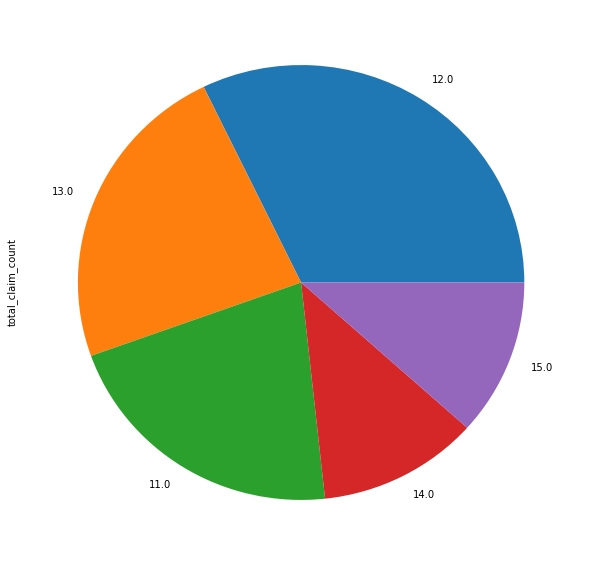

In [30]:
plot = df_Psychiatry['total_claim_count'].value_counts().head().plot.pie(figsize=(10, 10))
plot.title("Total Claim Count")
plot.show()

In [32]:
df_Psychiatry['generic_name'].describe()

count                     358
unique                     93
top       QUETIAPINE FUMARATE
freq                       18
Name: generic_name, dtype: object

In [33]:
df_Psychiatry['generic_name'].value_counts().head()

QUETIAPINE FUMARATE    18
LITHIUM CARBONATE      15
LAMOTRIGINE            15
TRAZODONE HCL          13
BUPROPION HCL          13
Name: generic_name, dtype: int64

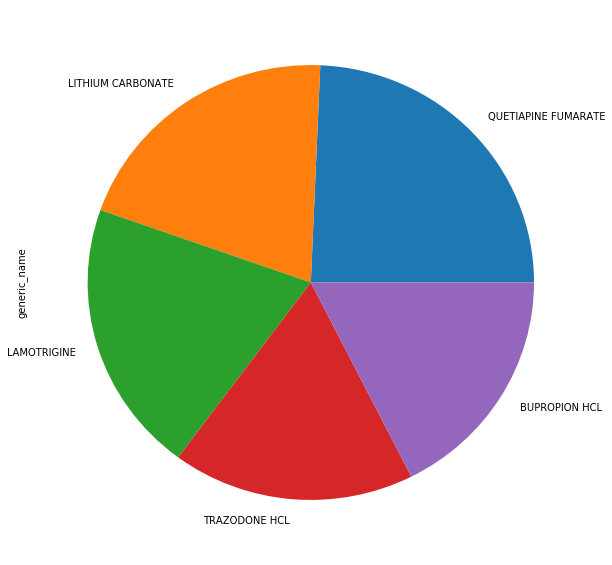

In [34]:
plot = df_Psychiatry['generic_name'].value_counts().head().plot.pie(y='Psychiatry generics', figsize=(10, 10))

In [35]:
df_Psychiatry['drug_name'].describe()

count                     358
unique                    112
top       QUETIAPINE FUMARATE
freq                       16
Name: drug_name, dtype: object

In [36]:
df_Psychiatry['drug_name'].value_counts().head()

QUETIAPINE FUMARATE    16
LAMOTRIGINE            15
TRAZODONE HCL          13
FLUOXETINE HCL         12
ALPRAZOLAM             12
Name: drug_name, dtype: int64

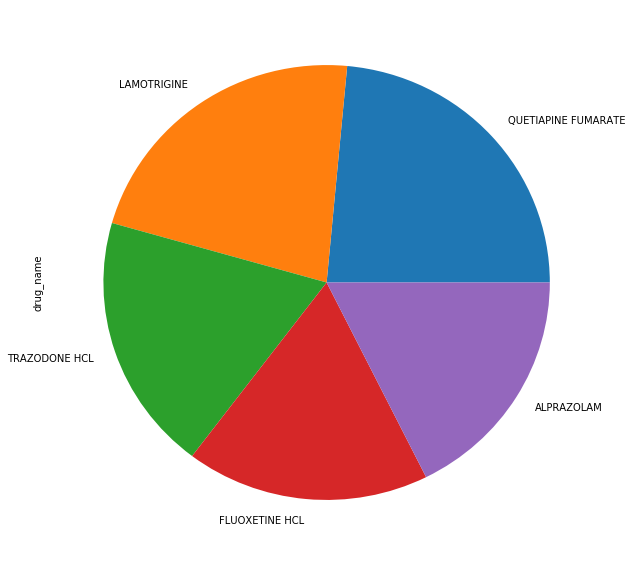

In [37]:
plot = df_Psychiatry['drug_name'].value_counts().head().plot.pie(y='Psychiatry drug', figsize=(10, 10))

In [38]:
df_PCP['total_drug_cost'].mean()

3141.930258453033

In [45]:
df_Psychiatry['total_drug_cost'].mean()

2697.820279329607

In [39]:
df_PCP['drug_name'].value_counts().head()

ATORVASTATIN CALCIUM    517
LISINOPRIL              502
AMLODIPINE BESYLATE     467
OMEPRAZOLE              465
METFORMIN HCL           456
Name: drug_name, dtype: int64

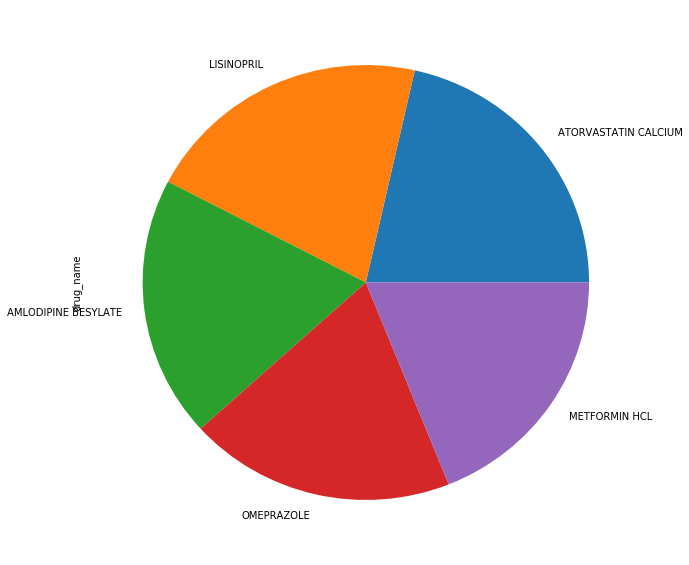

In [40]:
plot = df_PCP['drug_name'].value_counts().head().plot.pie(y='PCP drug', figsize=(10, 10))

In [41]:
df_PCP['drug_name'].describe()

count                    42677
unique                     998
top       ATORVASTATIN CALCIUM
freq                       517
Name: drug_name, dtype: object

In [42]:
df_PCP['generic_name'].describe()

count             42677
unique              734
top       METFORMIN HCL
freq                704
Name: generic_name, dtype: object

In [43]:
df_PCP['generic_name'].value_counts().head()

METFORMIN HCL           704
LEVOTHYROXINE SODIUM    631
ALBUTEROL SULFATE       605
POTASSIUM CHLORIDE      547
ATORVASTATIN CALCIUM    519
Name: generic_name, dtype: int64

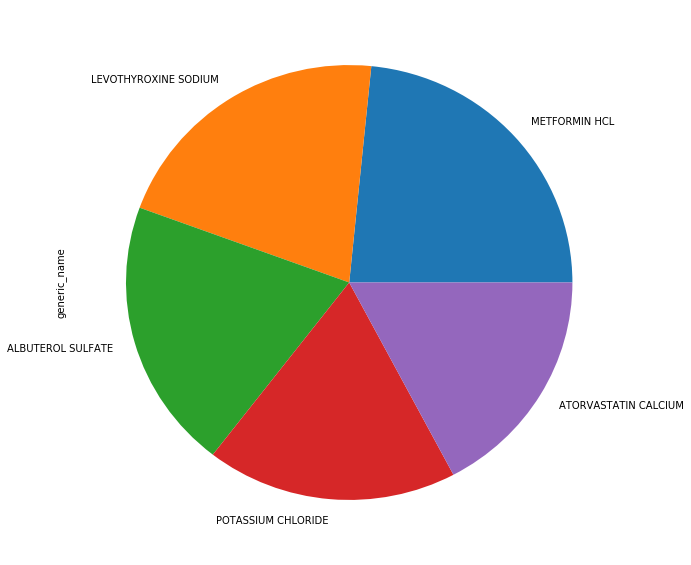

In [44]:
plot = df_PCP['generic_name'].value_counts().head().plot.pie(y='PCP generic', figsize=(10, 10))